In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Data Analytics\Project\heart.csv")

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


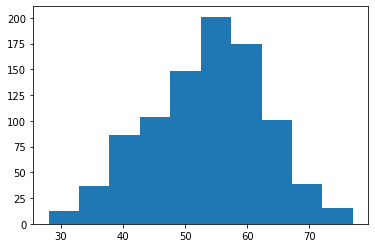

In [4]:
plt.hist(df['Age'])
plt.show()

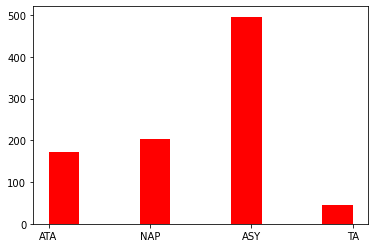

In [5]:
plt.hist(df['ChestPainType'], color = 'red')
plt.show()

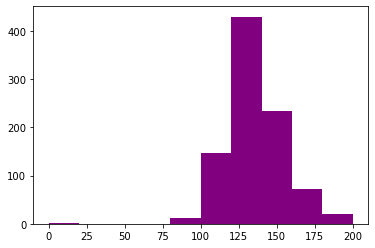

In [6]:
plt.hist(df['RestingBP'], color = 'purple')
plt.show()

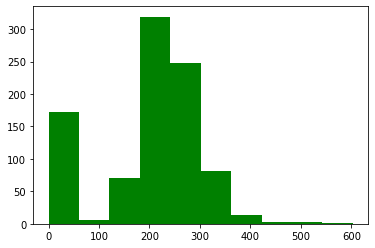

In [7]:
plt.hist(df['Cholesterol'], color = 'green')
plt.show()

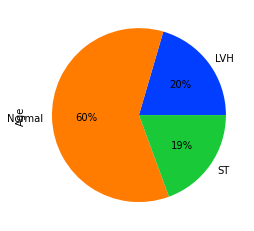

In [8]:
colors = sns.color_palette('bright')[0:5]
pie_data = df.groupby("RestingECG")['Age'].count()
pie_data
pie_data.plot.pie(colors = colors, autopct='%.0f%%')

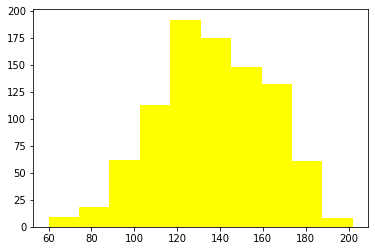

In [9]:
plt.hist(df['MaxHR'], color = 'yellow')
plt.show()

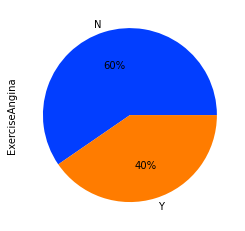

In [10]:
colors = sns.color_palette('bright')[0:5]
pie_data2 = df.groupby("ExerciseAngina")['ExerciseAngina'].count()
pie_data2.plot.pie(colors = colors, autopct='%.0f%%')

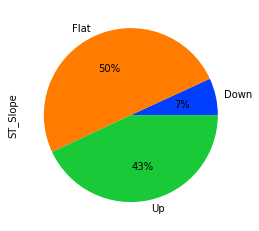

In [11]:
colors = sns.color_palette('bright')[0:5]
pie_data3 = df.groupby("ST_Slope")['ST_Slope'].count()
pie_data3.plot.pie(colors = colors, autopct='%.0f%%')

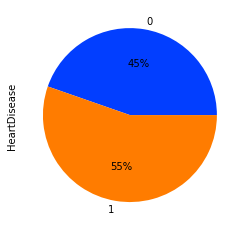

In [12]:
colors = sns.color_palette('bright')[0:5]
pie_data4 = df.groupby("HeartDisease")['HeartDisease'].count()
pie_data4.plot.pie(colors = colors, autopct='%.0f%%')

In [13]:
#removing Outliers in RestingBP - replace with median of accepted range
lower_bound = 0.1
upper_bound = 0.95
outliers = df.RestingBP.quantile([lower_bound, upper_bound])
print(outliers)                                                  #Upper and Lower bound of RestingBP

0.10    110.0
0.95    160.0
Name: RestingBP, dtype: float64


In [14]:
accepted_RestingBP = (df.RestingBP.values > outliers.loc[lower_bound]) & (df.RestingBP.values < outliers.loc[upper_bound])
median = np.median(df.RestingBP[accepted_RestingBP])
rejected_RBP = ~(accepted_RestingBP)
df.RestingBP[rejected_RBP] = median     #replace outliers with median of accepted RestingBP
median

<ipython-input-14-f073fe77b943>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.RestingBP[rejected_RBP] = median     #replace outliers with median of accepted RestingBP


130.0

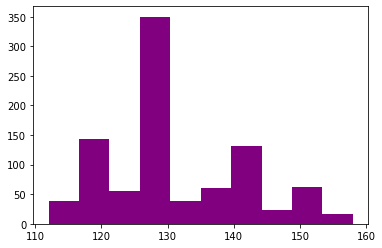

In [15]:
#visualizing the removal of outliers
plt.hist(df['RestingBP'], color = 'purple')
plt.show()

In [16]:
#removing Outliers in Cholesterol - replace with median of accepted range
lower_bound = 0.1
upper_bound = 0.95
outliers = df.Cholesterol.quantile([lower_bound, upper_bound])
print(outliers)     

0.10      0.0
0.95    331.3
Name: Cholesterol, dtype: float64


In [17]:
accepted_Cholesterol = (df.Cholesterol.values > outliers.loc[lower_bound]) & (df.Cholesterol.values < outliers.loc[upper_bound])
median = np.median(df.Cholesterol[accepted_Cholesterol])
rejected_C = ~(accepted_Cholesterol)
df.Cholesterol[rejected_C] = median     #replace outliers with median of accepted Cholesterol
median

<ipython-input-17-7cef404de4b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Cholesterol[rejected_C] = median     #replace outliers with median of accepted Cholesterol


233.0

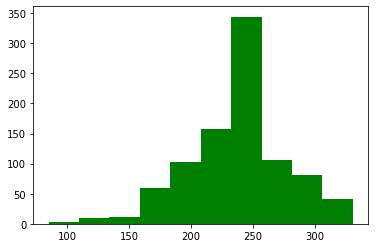

In [18]:
#visualizing the removal of outliers
plt.hist(df['Cholesterol'], color = 'green')
plt.show()

In [19]:
#Saving the dataset as a separate file - after removal of outliers
df.to_csv("D:\Data Analytics\Project\heart_after_outlier_removal.csv")

In [20]:
df = pd.read_csv("D:\Data Analytics\Project\heart_after_outlier_removal.csv")

In [21]:
del df['Unnamed: 0'] #removing the column that was automatically added by to_csv method
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.193793,0.063797,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.193793,1.000000,-0.001148,0.033950,-0.045088,0.142213,0.073347
Cholesterol,0.063797,-0.001148,1.000000,0.016227,0.009569,0.047711,0.068786
FastingBS,0.198039,0.033950,0.016227,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.045088,0.009569,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.142213,0.047711,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.073347,0.068786,0.267291,-0.400421,0.403951,1.000000
